In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ooo fancy deep learning
import tensorflow as tf


In [2]:
# Import and read CSV
df = pd.read_csv("charity_data.csv")
df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
 #Drop the EIN and NAME columns
    
df = df.drop(columns=["EIN", "NAME"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
# Determine the number of unique values for each column
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# For columns that have more than 10 unique values, determine the number of data points for each unique value.
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:
# For columns that have more than 10 unique values, determine the number of data points for each unique value.
df.ASK_AMT.value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [7]:
# For columns that have more than 10 unique values, determine the number of data points for each unique value.
df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Use the number of data points for each unique value to pick a cutoff point to bin "rare" categorical variables together in a new value, Other, and then check if the binning was successful.

application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
df.CLASSIFICATION.value_counts()[df.CLASSIFICATION.value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
classifications_to_replace = [row["index"] for indx, row in df.CLASSIFICATION.value_counts().reset_index().iterrows() if row.CLASSIFICATION < 1000] # garbage code

for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
#use `pd.get_dummies`to encode categorical variables
df = pd.get_dummies(df, dtype = float)
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [14]:
# Split data into our features and target arrays
X = df.drop(columns = ['IS_SUCCESSFUL']).values
y = df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.7 : 0.3


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train, and Evaluate the Model

In [16]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[7604 3622]
 [2955 9828]]

                  precision    recall  f1-score   support

           0       0.72      0.68      0.70     11226
           1       0.73      0.77      0.75     12783

    accuracy                           0.73     24009
   macro avg       0.73      0.72      0.72     24009
weighted avg       0.73      0.73      0.73     24009

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[3225 1587]
 [1305 4173]]

                  precision    recall  f1-score   support

           0       0.71      0.67      0.69      4812
           1       0.72      0.76      0.74      5478

    accuracy                           0.72     10290
   macro avg       0.72      0.72      0.72     10290
weighted avg       0.72      0.72      0.72     10290

    

AUC for the Model Test Set: 0.7589946804523315


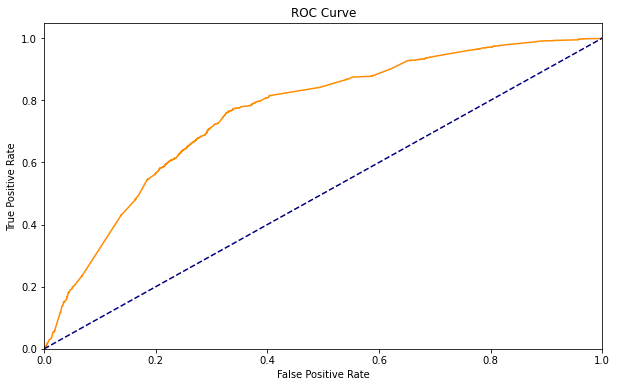

Brier Score:
2025.752815004359


In [17]:
#Logistic Regression model

lr = LogisticRegression(max_iter=10000)
evaluateModel(lr, X_train_scaled, X_test_scaled, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 8977  2249]
 [ 2090 10693]]

                  precision    recall  f1-score   support

           0       0.81      0.80      0.81     11226
           1       0.83      0.84      0.83     12783

    accuracy                           0.82     24009
   macro avg       0.82      0.82      0.82     24009
weighted avg       0.82      0.82      0.82     24009

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[3269 1543]
 [1439 4039]]

                  precision    recall  f1-score   support

           0       0.69      0.68      0.69      4812
           1       0.72      0.74      0.73      5478

    accuracy                           0.71     10290
   macro avg       0.71      0.71      0.71     10290
weighted avg       0.71      0.71      0.71     10290

    

AUC for the Model Test Set: 0.7550086425957743


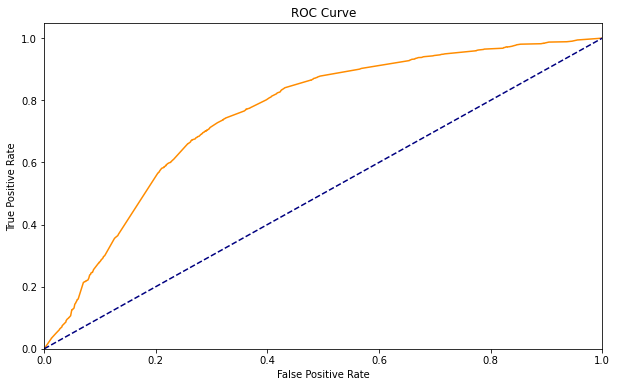

Brier Score:
2103.482282061032


In [18]:
# Randon Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 7972  3254]
 [ 2482 10301]]

                  precision    recall  f1-score   support

           0       0.76      0.71      0.74     11226
           1       0.76      0.81      0.78     12783

    accuracy                           0.76     24009
   macro avg       0.76      0.76      0.76     24009
weighted avg       0.76      0.76      0.76     24009

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[3209 1603]
 [1267 4211]]

                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      4812
           1       0.72      0.77      0.75      5478

    accuracy                           0.72     10290
   macro avg       0.72      0.72      0.72     10290
weighted avg       0.72      0.72      0.72     10290

    

AUC for the Model Test Set: 0.7792079297314702


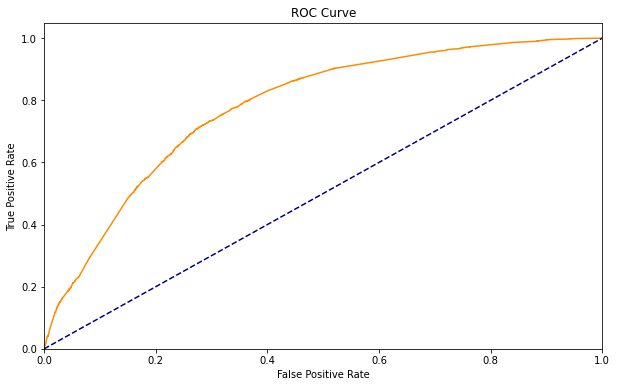

Brier Score:
1943.3029777246657


In [19]:
#XGBoost Model
xgb = XGBClassifier(random_state=42)

evaluateModel(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
751/751 [==============================] - 1s 785us/step - loss: 0.6216 - accuracy: 0.6681
Epoch 2/20
751/751 [==============================] - 1s 774us/step - loss: 0.5704 - accuracy: 0.7251
Epoch 3/20
751/751 [==============================] - 1s 767us/step - loss: 0.5628 - accuracy: 0.7278
Epoch 4/20
751/751 [==============================] - 1s 791us/step - loss: 0.5587 - accuracy: 0.7292
Epoch 5/20
751/751 [==============================] - 1s 763us/step - loss: 0.5563 - accuracy: 0.7310
Epoch 6/20
751/751 [==============================] - 1s 782us/step - loss: 0.5546 - accuracy: 0.7304
Epoch 7/20
751/751 [==============================] - 1s 776us/step - loss: 0.5533 - accuracy: 0.7330
Epoch 8/20
751/751 [==============================] - 1s 839us/step - loss: 0.5528 - accuracy: 0.7321
Epoch 9/20
751/751 [==============================] - 1s 763us/step - loss: 0.5517 - accuracy: 0.7319
Epoch 10/20
751/751 [==============================] - 1s 772us/step - loss: 0.551

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - loss: 0.5576 - accuracy: 0.7257 - 306ms/epoch - 950us/step
Loss: 0.5575966835021973, Accuracy: 0.7256559729576111


322/322 [==============================] - 0s 572us/step

  METRICS FOR THE TESTING SET:
  ----------------------------
  [[3157 1655]
 [1168 4310]]

                precision    recall  f1-score   support

           0       0.73      0.66      0.69      4812
           1       0.72      0.79      0.75      5478

    accuracy                           0.73     10290
   macro avg       0.73      0.72      0.72     10290
weighted avg       0.73      0.73      0.72     10290

  

AUC for the Model Test Set: 0.7798043606451803


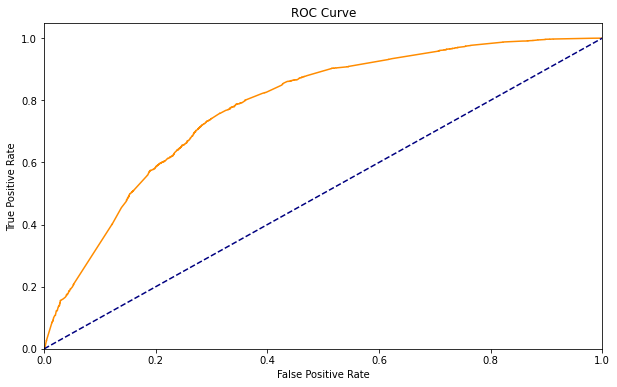

In [24]:
test_proba = [x[0] for x in nn.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]

output_test = f"""
  METRICS FOR THE TESTING SET:
  ----------------------------
  {confusion_matrix(y_test, test_preds)}

  {classification_report(y_test, test_preds)}
  """
print(output_test)
print()

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
# Export our model to HDF5 file
nn.save("hw21_nn.h5")